<a href="https://colab.research.google.com/github/AmanoKokoro/MNIST_sample/blob/master/untitle4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MNIST data set
MNIST is publicly available image data set which consists of 28 by 28 pixels image of hand-written single digits. So each image in MNIST is an image of a digit from 0 to 9. MNIST challenge is to develop a machine learning algorithm that can classify these images into 10 classes (0 to 9).

### Preparation?
You can run this notebook on [google colaboratory](https://colab.research.google.com) and you do not need to run on your own machine (you certainly can use your machine if you prefer!). 

In this notebook, we get ourselves familiar with MNIST data set and tensorflow's handy API to access MNIST.

In [62]:
!pip install tensorflow keras numpy mnist matplotlib

In [63]:
import os
import numpy as np
import mnist
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import models
from keras import backend as K
from keras import layers
from keras.layers import MaxPooling2D
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.utils  import plot_model

In [64]:
#データ読み込み
train_images = mnist.train_images()
train_labels = mnist.train_labels()
test_images = mnist.test_images()
test_labels = mnist.test_labels()

In [65]:
# Normize the images. Normalize the pixel values from[0, 255] tp
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [66]:
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

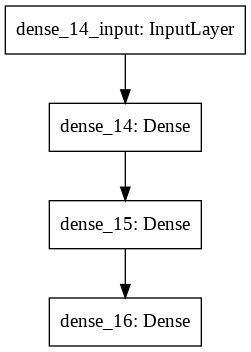

In [67]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

plot_model(model, to_file='model.png')



In [68]:
#チェックポイント
check_path = "kadainantoka/cp.ckpt"
check_dir = os.path.dirname(check_path)
cp_callback = tf.keras.callbacks.ModelCheckpoint(check_path, save_weights_only=True, verbose=1)


In [69]:
history = model.fit(
    train_images,
    to_categorical(train_labels),
    epochs = 5, 
    batch_size=32,
    verbose=1
)

print(history.history)



Epoch 1/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.3511 - accuracy: 0.8948
Epoch 2/5
60000/60000 [==============================] - 8s 136us/step - loss: 0.1902 - accuracy: 0.9430
Epoch 3/5
60000/60000 [==============================] - 8s 138us/step - loss: 0.1499 - accuracy: 0.9540
Epoch 4/5
60000/60000 [==============================] - 9s 145us/step - loss: 0.1269 - accuracy: 0.9606
Epoch 5/5
60000/60000 [==============================] - 8s 137us/step - loss: 0.1139 - accuracy: 0.9640
{'loss': [0.35109672280649346, 0.1902090038202703, 0.1499242126725614, 0.12687150194446245, 0.11388989589214325], 'accuracy': [0.8948333, 0.943, 0.9539833, 0.96061665, 0.9640333]}


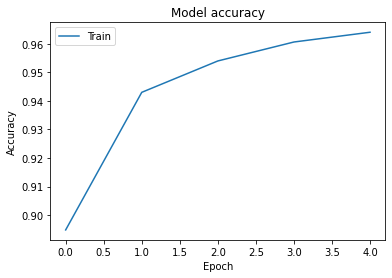

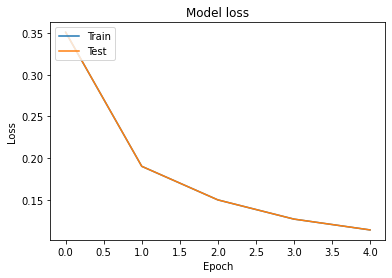

In [70]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [71]:
model.evaluate(
    test_images,
    to_categorical(test_labels)
)


10000/10000 [==============================] - 1s 81us/step


[0.1328964334378019, 0.9581999778747559]

In [72]:
predications = model.predict(test_images[:5])
print(predications)

print(np.argmax(predications, axis = 1))
print(test_labels[:5])

[[2.55106152e-05 9.17165096e-07 8.86903581e-05 6.39025966e-05
  1.26752857e-08 1.68170845e-05 1.54562276e-13 9.99787509e-01
  1.86635006e-07 1.65291622e-05]
 [4.41914235e-05 2.83663830e-05 9.99900460e-01 1.18406997e-05
  7.08288667e-07 1.12598843e-06 1.19427332e-05 1.90012270e-10
  1.32977755e-06 1.43904344e-12]
 [1.52555708e-06 9.71186876e-01 1.04988301e-02 2.86312978e-04
  1.06172796e-04 5.15850214e-03 7.75520690e-03 1.68098009e-03
  3.32392566e-03 1.76693504e-06]
 [9.99950528e-01 2.41337478e-10 2.21347291e-05 1.51434094e-07
  4.71528665e-08 5.04011837e-08 2.26185966e-05 1.23963503e-06
  1.12921068e-08 3.18431853e-06]
 [8.47003030e-05 1.84609590e-08 8.91228046e-06 4.08506224e-08
  9.97000515e-01 7.98160727e-06 2.52856116e-04 1.38430361e-04
  3.24126677e-06 2.50329124e-03]]
[7 2 1 0 4]
[7 2 1 0 4]


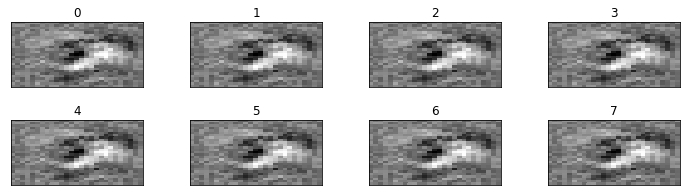

In [73]:
model2 = Sequential()
model2.add(model.layers[0])
weight = model.layers[0].get_weights()[0]
plt.figure(1, figsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)

for i in range(8):
  plt.subplot(2, 4, i+1)
  w1 = weight[:, 1]
  w1 = w1.reshape(28, 28)
  plt.pcolor(-w1)
  plt.xlim(0, 27)
  plt.ylim(27, 0)
  plt.xticks([], "")
  plt.yticks([], "")
  plt.title("%d" % i)
plt.show()

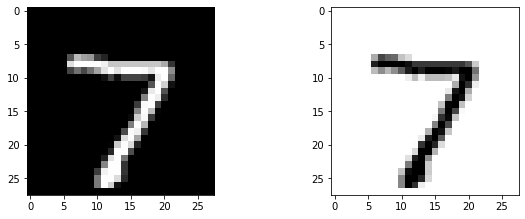

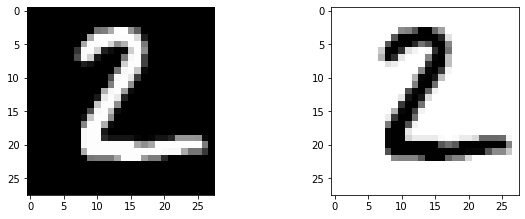

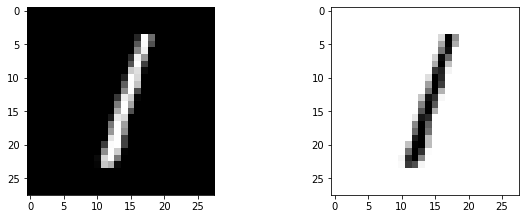

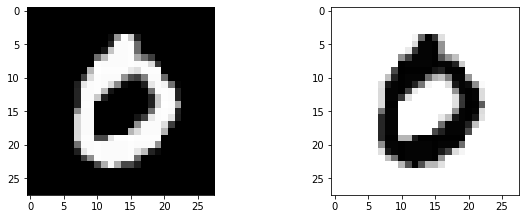

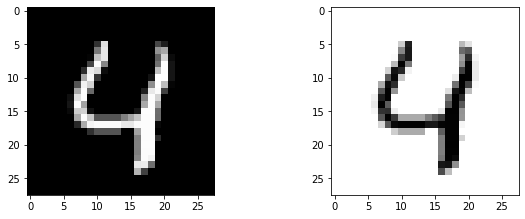

In [74]:
for i in range(5):
  fig = plt.figure(figsize=(10, 20))

  pixels  = test_images[i].reshape((28, 28))
  a = fig.add_subplot(5, 2, 2*i+1)
  a.imshow(pixels)

  pred2 = test_images[i].reshape((28, 28))
  a = fig.add_subplot(5, 2, 2*i+2)
  a.imshow(pred2, cmap='gray_r')
plt.show()